In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Moving Averages

Simple, Exponential Moving Average (Adjust = True and Adjust = False)


## Standard Moving Average (SMA)
Definition:
The Simple Moving Average (SMA) calculates the unweighted mean of the previous 
ùëõ
n periods of data. It‚Äôs called standard because it's the most basic and commonly used moving average method.

Use Case: Stock Market Analysis (Trend Detection)
Example: In stock trading, an investor may use a 20-day SMA to track the average closing price of a stock over the last 20 days. This smooths out daily price fluctuations and helps the investor identify the overall trend.

Why It's Used: Traders use SMA to understand whether the stock price is trending upward or downward without the noise of daily volatility. For example, a 50-day SMA crossing above a 200-day SMA is often seen as a bullish signal (Golden Cross), while the opposite is considered bearish (Death Cross).

## Centered Moving Average (CMA)
Definition:
A Centered Moving Average calculates the moving average by averaging values equally on both sides of a central point. This is used to smooth data symmetrically around a central point in time, which removes the lag introduced by traditional moving averages.

Use Case: Seasonality Detection in Sales Data
Example: A company that sells products with clear seasonal demand patterns (e.g., air conditioners) might use a 12-month Centered Moving Average to isolate the underlying sales trend. For instance, if they want to remove the effect of seasonality from their sales data, they may compute the centered moving average by averaging 6 months before and 6 months after a specific month to identify the overall trend.

Why It's Used: Centered Moving Averages are used to eliminate the lagging effect of traditional moving averages and better identify the trend when seasonality or cycles are present. It helps in separating the trend from the seasonal effects more accurately, especially in time series with repetitive patterns.

## Lagged Moving Average
Definition:
The Lagged Moving Average calculates the moving average based only on past values (i.e., a fixed window of previous data points). It focuses entirely on historical data and hence introduces a lag‚Äîmeaning it reacts to changes in the data with a delay.

Use Case: Energy Consumption Forecasting
Example: In power grid management, operators may use a lagged 30-day moving average of electricity consumption to smooth out short-term fluctuations caused by daily or hourly variability in usage. This helps them make day-ahead or week-ahead forecasts for energy production.

Why It's Used: Lagged Moving Averages are useful when real-time forecasting is not required, and historical trends are more significant. By focusing on past data only, it provides more stable predictions, but it will react slower to sudden changes (e.g., a cold snap that drastically increases energy demand).


In [2]:
# Step 1: Generate a time series data
np.random.seed(0)  # For reproducibility
dates = pd.date_range(start='2023-01-01', periods=100)
data = np.random.randint(0, 11, size=100) + 100  # Simulating some random walk data
time_series = pd.Series(data, index=dates)

# Step 2: Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
window_size = 10  # Define the window size for moving averages
sma = time_series.rolling(window=window_size).mean()
ema = time_series.ewm(span=window_size, adjust=False).mean()

# Step 3: Plotting the time series and moving averages
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Time Series', color='blue', alpha=0.5)
plt.plot(sma, label='Simple Moving Average (SMA)', color='red', linewidth=2)
plt.plot(ema, label='Exponential Moving Average (EMA)', color='green', linewidth=2)
plt.title('Time Series with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate a seasonal time series data
np.random.seed(0)  # For reproducibility
dates = pd.date_range(start='2023-01-01', periods=100)
# Create seasonal data: a sine wave pattern to simulate seasonality with noise
seasonal_data = 10 * np.sin(np.linspace(0, 3 * np.pi, 100)) + np.random.normal(0, 2, 100) + 100
time_series = pd.Series(seasonal_data, index=dates)

# Step 2: Calculate Centered Moving Average (CMA)
window_size = 10  # Define the window size for moving average
sma = time_series.rolling(window=window_size).mean()
cma = time_series.rolling(window=window_size, center=True).mean()

# Step 3: Plotting the time series and CMA
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Seasonal Time Series', color='blue', alpha=0.5)
plt.plot(cma, label='Centered Moving Average (CMA)', color='orange', linewidth=2)
plt.plot(sma, label='Simple Moving Average (SMA)', color='red', linewidth=2)
plt.title('Seasonal Time Series with Centered Moving Average (CMA)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


In [4]:
# Step 1: Generate a time series data (same as above)
np.random.seed(0)  # For reproducibility
dates = pd.date_range(start='2023-01-01', periods=100)
data = np.random.randint(0, 11, size=100) + 100  # Simulating some random walk data
time_series = pd.Series(data, index=dates)

# Step 2: Calculate Lagged Moving Average
window_size = 10  # Define the window size for moving average
lagged_ma = time_series.shift().rolling(window=window_size).mean()

# Step 3: Plotting the time series and Lagged Moving Average
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Time Series', color='blue', alpha=0.5)
plt.plot(lagged_ma, label='Lagged Moving Average', color='purple', linewidth=2)
plt.title('Time Series with Lagged Moving Average')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Decomposition
1. Create a sample data with Trend + Seasonality + Error for both additive and multiplicative
2. Find the trend using Moving Averages and Seasonality using averages
3. How to find the trend, seasonality, residuals?
4. How to find additive or multiplicative time series?

In many time series, the amplitude of both the seasonal and irregular variations increase as the level of the trend rises. ‚Äì In this situation, a multiplicative model is usually appropriate.

In some time series, the amplitude of both the seasonal and irregular variations do not change as the level of the trend rises or falls. ‚Äì In such cases, an additive model is appropriate.

1. Trend -> Remove Trend by finding the trend using Moving Averages
2. Seasonality -> Find seasonality from the average differences / deviations and remove seasonality
3. Residuals -> Check if the remainder is just white noise or not

In [35]:
# Parameters for the time series
np.random.seed(42)  # For reproducibility
n = 200  # Number of time points
time = np.arange(n)
dates = pd.date_range(start='2023-01-01', periods=200)

# Create components
# Trend: Linear upward trend
trend = 0.05 * time

# Seasonality: Sine wave with a period of 50 time points
period = 50
seasonality = 10 * np.sin(2 * np.pi * time / 50)

# Error: Random noise (Gaussian)
error = np.random.normal(0, 2, n)

# Combine components into the final time series
time_series = trend + seasonality + error
time_series = pd.Series(time_series, index=dates)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(time, time_series, label='Time Series (Trend + Seasonality + Noise)', color='b')
plt.plot(time, trend, label='Trend', linestyle='--', color='r')
plt.plot(time, seasonality, label='Seasonality', linestyle='--', color='g')
plt.title('Sample Time Series with Trend, Seasonality, and Error')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Find the trend

# Remove the trend
# Find the seasonal component
# Remove the seasonal component
# Find the Series Trend
# Remove the Series Trend
# Residuals

# Do the above with Polyfit

In [ ]:
# Find the trend

# Remove the trend
# Find the seasonal component
# Remove the seasonal component
# Find the Series Trend
# Remove the Series Trend
# Residuals

# Do the above with Moving Averages

In [ ]:
# Find the trend

# Remove the trend
# Find the seasonal component
# Remove the seasonal component
# Find the Series Trend
# Remove the Series Trend
# Residuals

# Do the above with LOESS

## What is White Noise?

White noise refers to a sequence of random variables (or time series data) that are uncorrelated, have a constant mean, and exhibit a constant variance over time. Essentially, it is a random signal that has equal intensity at different frequencies, making it a useful model for various statistical applications.

Characteristics of White Noise
Independence:

The values in a white noise series are statistically independent from one another, meaning that the occurrence of one value does not affect the others.
Mean:

The mean (average) of the white noise series is typically zero, although it can be non-zero depending on the context.
Constant Variance:

The variance of the series is constant over time, indicating that the fluctuations in the data are uniform.
No Autocorrelation:

The autocorrelation of a white noise series at all lags (except lag zero) is zero, meaning there is no predictable pattern or relationship between values at different times.


In [ ]:
# Take the residuals and test whether they are actually are white noise or not

# LOESS

1. Find Trend and Seasonality by implementing LOESS

In [7]:
# Sample data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)

# LOESS smoothing
lowess = sm.nonparametric.lowess(y, x, frac=0.3)  # frac is the smoothing parameter

# Extract the smoothed values
x_smoothed = lowess[:, 0]
y_smoothed = lowess[:, 1]

# Plotting
plt.scatter(x, y, label='Original Data', alpha=0.5)
plt.plot(x_smoothed, y_smoothed, color='red', label='LOESS Smoothed')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LOESS Smoothing')
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic time series data
np.random.seed(0)
t = np.arange(120)
seasonal_effect = 10 * np.sin(2 * np.pi * t / 12)  # Seasonal component
trend_effect = 0.5 * t  # Trend component
noise = np.random.normal(scale=1, size=t.shape)  # Noise
data = trend_effect + seasonal_effect + noise

# Step 1: Fit LOESS for Trend
trend = sm.nonparametric.lowess(data, t, frac=0.3)[:, 1]

# Step 2: Remove Trend
detrended = data - trend

# Step 3: Fit LOESS for Seasonality
seasonal = sm.nonparametric.lowess(detrended, t, frac=1)[:, 1]
    
# Step 4: Calculate Residuals
residuals = detrended - seasonal

# Plotting
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(3, 1, 1)
plt.plot(t, data, label='Original Data', color='lightblue')
plt.plot(t, trend, label='Trend', color='red')
plt.title('Original Data and Trend')
plt.legend()

# Detrended data
plt.subplot(3, 1, 2)
plt.plot(t, detrended, label='Detrended Data', color='lightgreen')
plt.plot(t, seasonal, label='Seasonality', color='orange')
plt.title('Detrended Data and Seasonality')
plt.legend()

# Residuals
plt.subplot(3, 1, 3)
plt.plot(t, residuals, label='Residuals', color='purple')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

# Generate synthetic time series data
np.random.seed(0)
t = np.arange(120)
seasonal_effect = 10 * np.sin(2 * np.pi * t / 12)  # Seasonal component
trend_effect = 0.5 * t  # Trend component
noise = np.random.normal(scale=1, size=t.shape)  # Noise
data = trend_effect + seasonal_effect + noise

# STL decomposition
stl = STL(data, period=12)
result = stl.fit()

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(data, label='Original Data', color='lightblue')
plt.title('Original Data')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result.trend, label='Trend', color='red')
plt.title('Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.tight_layout()
plt.show()

# Exponential Smoothing Models
1. How to find the theta that is best fit for the model
2. Including Trend (Holt ESM), Seasonality (Winters ESM) these models too

# Stationarity

1. Strong Stationarity
2. Weak Stationarity - mean / variance / autocorrelation

Making the time series stationary. 
Common Soln - Differencing
Do it for trends and the Seasonal data 
The above is for mean

ARCH / GARCH models - Modeling variance

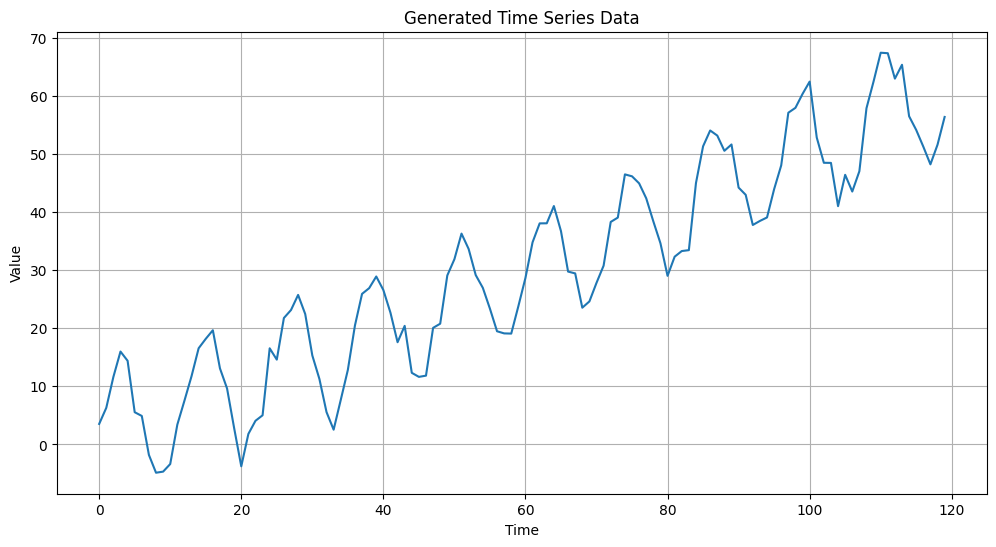


--- ADF Test ---
ADF Statistic: 2.4058674150476578
p-value: 0.9990130441551385
Critical Values:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Step 1: Generate a synthetic time series (non-stationary)
np.random.seed(0)
n = 120
time = np.arange(n)
trend = 0.5 * time  # Linear trend
seasonal = 10 * np.sin(2 * np.pi * time / 12)  # Seasonal component
noise = np.random.normal(scale=2, size=n)  # Noise
data = trend + seasonal + noise

# Convert to a Pandas Series
ts = pd.Series(data)

# Step 2: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Generated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()

# Step 3: Define ADF test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Step 4: Check stationarity using ADF and KPSS tests
print("\n--- ADF Test ---")
adf_test(ts)



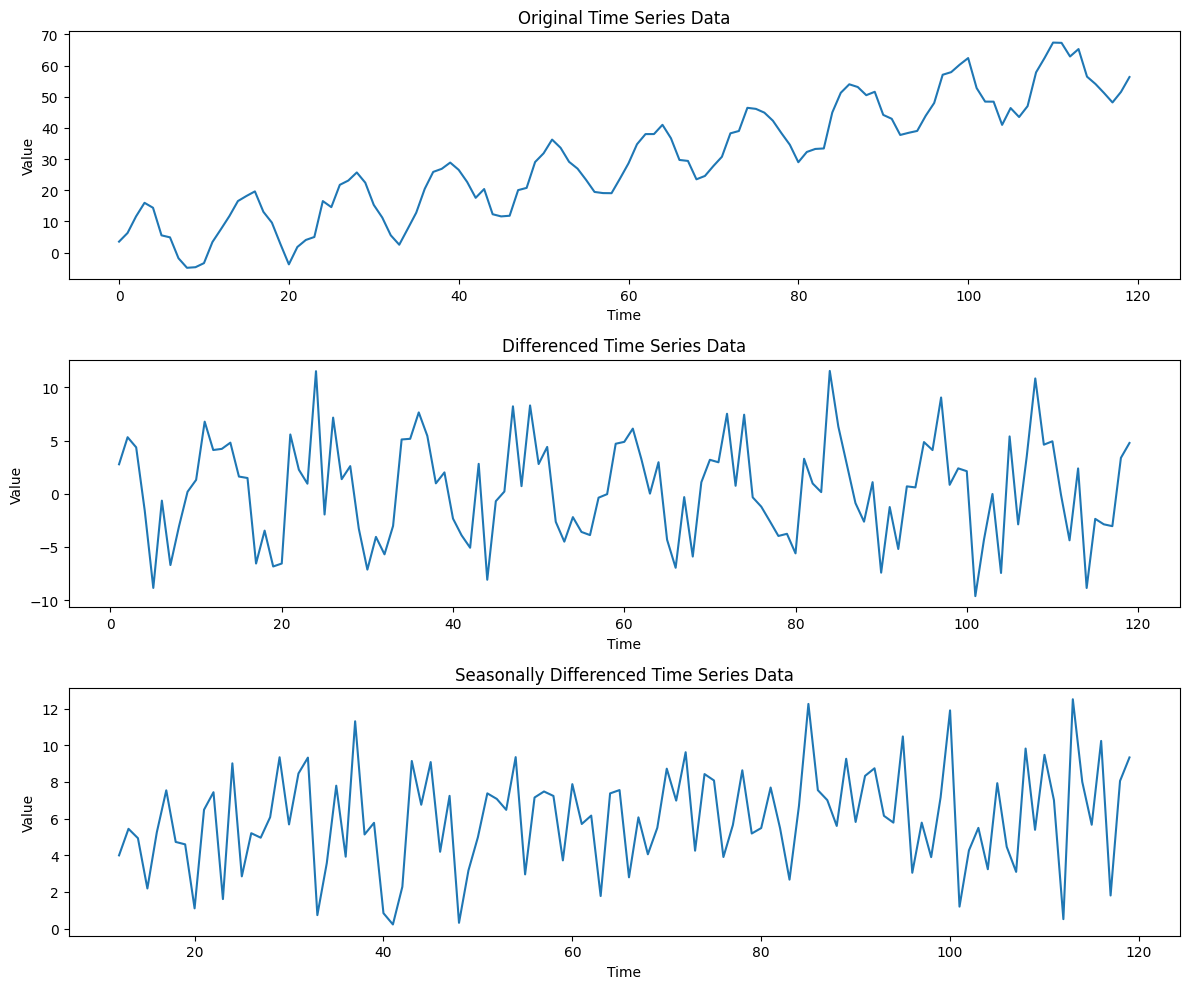

ADF Statistic: -7.85497722512478
p-value: 5.4733874725736245e-12
Critical Values:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Generate a synthetic time series (non-stationary)
np.random.seed(0)
n = 120
time = np.arange(n)
trend = 0.5 * time  # Linear trend
seasonal = 10 * np.sin(2 * np.pi * time / 12)  # Seasonal component
noise = np.random.normal(scale=2, size=n)  # Noise
data = trend + seasonal + noise

# Convert to a Pandas Series
ts = pd.Series(data)

# Step 1: Detrending using differencing
# Differencing the data
differenced_ts = ts.diff().dropna()

# Step 2: Detrending using seasonal differencing
seasonal_differenced_ts = ts.diff(12).dropna()

# Step 3: Plot the original and transformed series
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(ts)
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(3, 1, 2)
plt.plot(differenced_ts)
plt.title('Differenced Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(3, 1, 3)
plt.plot(seasonal_differenced_ts)
plt.title('Seasonally Differenced Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Step 4: Check stationarity using ADF on the differenced series
adf_test(differenced_ts)

# AR models

In [ ]:
# Vizualize AR(1), AR(p) models

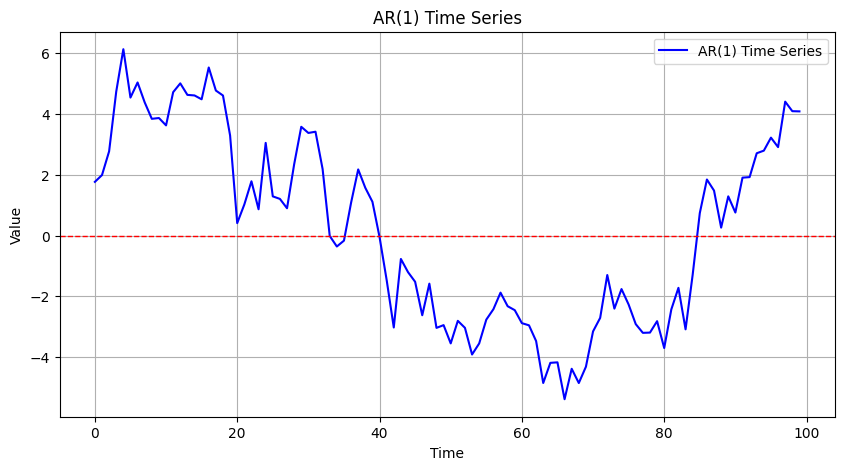

In [9]:
# AR(1) model

# Parameters for the AR(1) process
np.random.seed(0)
n = 100  # Number of observations
phi = 0.9  # AR coefficient
sigma = 1  # Standard deviation of noise

# Initialize the time series
ar1_series = np.zeros(n)
ar1_series[0] = np.random.normal()  # Starting value

# Generate AR(1) series
for t in range(1, n):
    ar1_series[t] = phi * ar1_series[t - 1] + np.random.normal(0, sigma)

# Convert to a Pandas Series
ar1_series = pd.Series(ar1_series)

# Step 2: Plot the AR(1) time series
plt.figure(figsize=(10, 5))
plt.plot(ar1_series, label='AR(1) Time Series', color='blue')
plt.title('AR(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.axhline(0, color='red', linestyle='--', lw=1)  # Add a horizontal line at 0
plt.legend()
plt.grid()
plt.show()

In [11]:
ar1_series.values

array([ 1.76405235,  1.98780432,  2.76776187,  4.73187888,  6.12624899,
        4.53634621,  5.0328    ,  4.3781628 ,  3.83712766,  3.8640134 ,
        3.62165563,  4.71376357,  5.00342494,  4.62475746,  4.60614495,
        4.47920478,  5.52536338,  4.76766878,  4.6039696 ,  3.2894769 ,
        0.4075394 ,  1.02040405,  1.78279984,  0.86235484,  3.04587398,
        1.28692091,  1.20398733,  0.89640475,  2.33954349,  3.57494791,
        3.37240055,  3.41332301,  2.18420496, -0.015012  , -0.36142295,
       -0.16893169,  1.07825216,  2.17280679,  1.5681993 ,  1.10907662,
       -0.05038401, -1.46536355, -3.02509738, -0.77181225, -1.20428321,
       -1.52192919, -2.62253163, -1.58278811, -3.03840715, -2.94730671,
       -3.5480426 , -2.80633584, -3.0365074 , -3.91348884, -3.55032219,
       -2.7669581 , -2.42374506, -1.87889866, -2.32533089, -2.45553896,
       -2.88244552, -2.95375413, -3.471525  , -4.8506551 , -4.18816345,
       -4.17112804, -5.38421358, -4.38300997, -4.85200734, -4.31

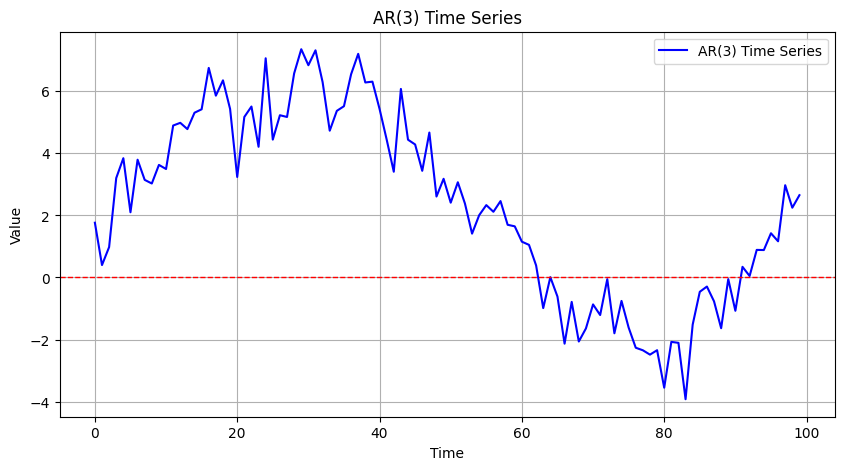

In [12]:
# AR(p)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the AR(p) process
np.random.seed(0)
n = 100  # Number of observations
p = 3  # Order of the AR process
phi = [0.5, 0.3, 0.2]  # AR coefficients
sigma = 1  # Standard deviation of noise

# Initialize the time series
ar_series = np.zeros(n)
ar_series[:p] = np.random.normal(size=p)  # Starting values

# Generate AR(p) series
for t in range(p, n):
    ar_series[t] = np.sum([phi[i] * ar_series[t - i - 1] for i in range(p)]) + np.random.normal(0, sigma)

# Convert to a Pandas Series
ar_series = pd.Series(ar_series)

# Step 2: Plot the AR(p) time series
plt.figure(figsize=(10, 5))
plt.plot(ar_series, label='AR(3) Time Series', color='blue')
plt.title('AR(3) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.axhline(0, color='red', linestyle='--', lw=1)  # Add a horizontal line at 0
plt.legend()
plt.grid()
plt.show()

In [ ]:
# How to select P

p of an autoregressive (AR) process from a given time series, you can use several methods, including:

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):

ACF: Measures the correlation of the time series with its own lagged values.
PACF: Measures the correlation between the time series and its lagged values after removing the effects of intermediate lags.
For an AR(p) process, the PACF will show a cutoff after lag 
ùëù
p (i.e., it will be significant up to lag 
ùëù
p and close to zero afterwards). The ACF will typically decay more slowly.
Information Criteria:

Use criteria like Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC) to compare models of different orders. Lower AIC or BIC values indicate a better fit.
Fit multiple AR models (e.g., AR(1), AR(2), ..., AR(p)) and calculate the AIC/BIC for each.
Fitting and Diagnostic Checking:

Fit AR models of varying orders and assess the residuals.
Use statistical tests like the Ljung-Box test on the residuals to check if there are significant autocorrelations left.


# MA Models

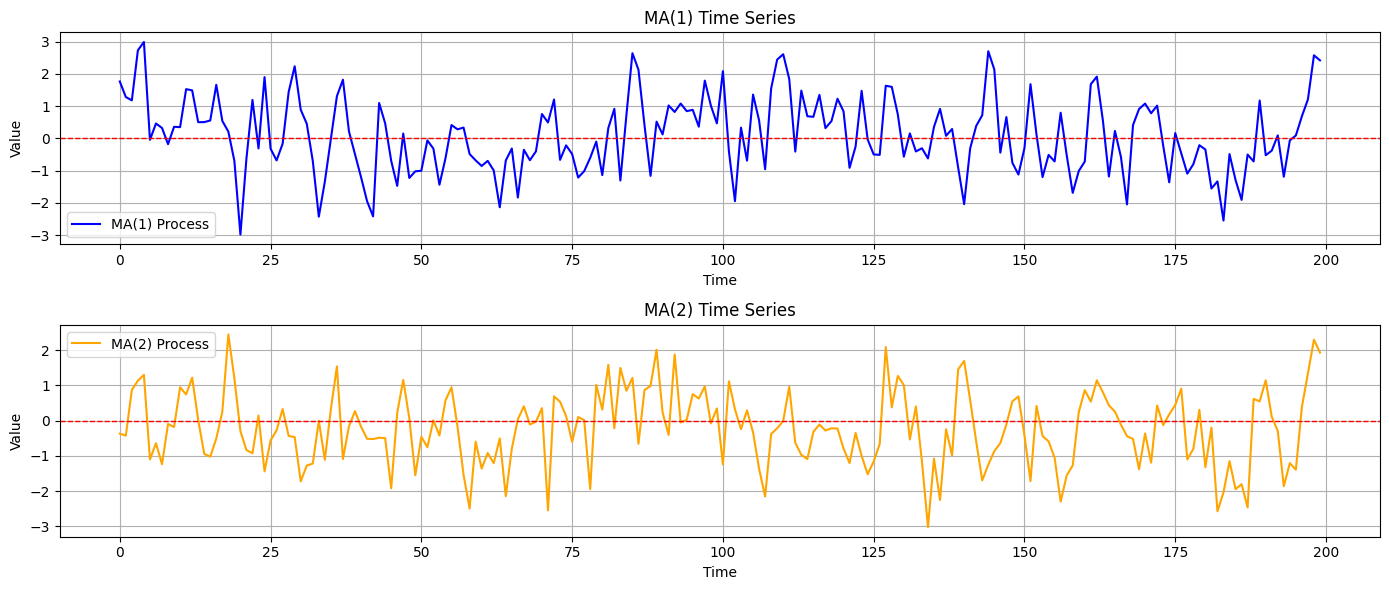

In [16]:
# Example of MA(n) model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Set random seed for reproducibility
np.random.seed(0)

# Define parameters for MA(1) and MA(2) processes
ma1 = ArmaProcess(np.array([1]), np.array([1, 0.5]))  # MA(1) with theta = 0.5
ma2 = ArmaProcess(np.array([1]), np.array([1, 0.5, 0.3]))  # MA(2) with theta_1 = 0.5, theta_2 = 0.3

# Generate sample data
n = 200  # Number of observations
ma1_series = ma1.generate_sample(nsample=n)
ma2_series = ma2.generate_sample(nsample=n)

# Convert to Pandas Series
ma1_series = pd.Series(ma1_series)
ma2_series = pd.Series(ma2_series)

# Plot MA(1) and MA(2) time series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(ma1_series, label='MA(1) Process', color='blue')
plt.title('MA(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.axhline(0, color='red', linestyle='--', lw=1)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(ma2_series, label='MA(2) Process', color='orange')
plt.title('MA(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.axhline(0, color='red', linestyle='--', lw=1)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# How to select n

Selecting the order 
ùëõ
n of a Moving Average (MA) model based on a plot involves a combination of visual inspection and statistical criteria. Here are the steps you can follow to determine the appropriate order 
ùëõ
n:

1. Examine the ACF Plot
The Autocorrelation Function (ACF) plot is crucial for identifying the order of an MA process.
For an MA(q) process, the ACF will show significant spikes up to lag 
ùëû
q and drop to zero afterward.
Thus, when you observe the ACF:
Count the number of significant lags before the ACF cuts off (becomes non-significant).
This count gives a preliminary indication of the maximum order 
ùëõ
n for your MA model.
2. Look for Patterns in the ACF
Significant Lag: A significant spike at a lag indicates that the MA term influences the series at that lag.
Cutoff: If the ACF returns to zero after a certain lag (e.g., after lag 2 or 3), that suggests an MA model of order 
ùëõ
n equal to that lag.
3. Statistical Criteria
After visually inspecting the ACF, you can fit MA models of different orders (e.g., MA(1), MA(2), MA(3), etc.) and compare them using criteria such as:
Akaike Information Criterion (AIC)
Bayesian Information Criterion (BIC)
Lower AIC or BIC values suggest a better fit for the model.
4. Model Fitting and Residual Analysis
Fit several MA models based on the orders suggested by the ACF.
Analyze the residuals:
Residuals should resemble white noise (no significant autocorrelation).
Use the Ljung-Box test to check for autocorrelation in residuals.

# Visual Inspection for AR and MA models

Visual Inspection of ACF and PACF Plots
1. ACF (Autocorrelation Function) Plot
MA(q) Process:

Behavior: The ACF will show significant spikes only for the first 
ùëû
q lags and then drop to zero.
Reason: An MA(q) process is defined by the relationship between the current value and the previous 
ùëû
q error terms. Beyond lag 
ùëû
q, there are no further dependencies because the influence of the error terms has been fully accounted for. Thus, the ACF cuts off.
AR(p) Process:

Behavior: The ACF typically decays gradually (exponentially or sinusoidally).
Reason: An AR(p) process relies on the previous 
ùëù
p values of the series itself. As you look further back in time (increasing lag), past values still have a diminishing but non-zero effect on the current value. Therefore, the ACF does not cut off but rather tapers off gradually.
2. PACF (Partial Autocorrelation Function) Plot
AR(p) Process:

Behavior: The PACF will show significant spikes for the first 
ùëù
p lags and then drop to zero.
Reason: The PACF measures the correlation between the current value and the value at lag 
ùëò
k, after accounting for the correlations at shorter lags. For an AR(p) process, once you include the 
ùëù
p lags, the relationship is fully captured, and additional lags do not provide extra information, leading to a cutoff.
MA(q) Process:

Behavior: The PACF typically decays gradually.
Reason: In an MA(q) process, the value at time 
ùë°
t is influenced by the current and past error terms, but the residual effects of previous lags do not completely disappear after the first few lags. Thus, while the direct influence drops off, it does not do so abruptly.
Summary of Visual Cues
ACF:

Cutoff after lag 
ùëû
q indicates an MA(q) process.
Gradual decay indicates an AR(p) process.
PACF:

Cutoff after lag 
ùëù
p indicates an AR(p) process.
Gradual decay indicates an MA(q) process.
Practical Steps
Plot ACF and PACF: Generate these plots for your time series data.
Analyze ACF:
If you see a clear cutoff after a specific lag 
ùëû
q, consider fitting an MA model.
If the ACF gradually decays, consider fitting an AR model.
Analyze PACF:
If the PACF cuts off after a specific lag 
ùëù
p, it suggests an AR model.
If it decays gradually, it supports the MA model.


# ARIMA Models

Selecting p for AR and n for MA

1. Plotting patterns in correlation
2. Automatic Selection Techniques
a. MINIC
b. SCAN
c. ESACF

In [ ]:
# Visualize some ARIMA and SARIMA models

In [ ]:
# How to Select P, D, Q in ARIMA

Step-by-Step Process to Select 
ùëù
p, 
ùëë
d, and 
ùëû
q
1. Determine the Order of Differencing 
ùëë
d
The first step in ARIMA modeling is to ensure that the time series is stationary. Differencing helps remove trends and seasonality.

Check for Stationarity:
Use statistical tests like the Augmented Dickey-Fuller (ADF) test or the KPSS test. If the p-value is above a significance level (e.g., 0.05), the series is non-stationary.
Differencing:
Apply differencing to remove trends:
ùëë
=
1
d=1 for first differencing
ùëë
=
2
d=2 for second differencing, etc.
The goal is to achieve stationarity. Typically, 
ùëë
d is set to either 0 or 1 for most applications.
2. Determine the Order of Autoregression 
ùëù
p
Once the series is stationary, you can identify the order of the AR term.

Use ACF and PACF:
PACF Plot:
The lag where the PACF cuts off (becomes non-significant) indicates the order 
ùëù
p of the AR component.
For example, if the PACF cuts off at lag 2, you might set 
ùëù
=
2
p=2.
3. Determine the Order of Moving Average 
ùëû
q
Next, analyze the MA component of the model.

Use ACF:
ACF Plot:
The lag where the ACF cuts off indicates the order 
ùëû
q of the MA component.
For instance, if the ACF cuts off at lag 1, you might set 
ùëû
=
1
q=1.
4. Refine 
ùëù
p, 
ùëë
d, and 
ùëû
q
Iterative Fitting:

Fit multiple ARIMA models with different combinations of 
ùëù
p, 
ùëë
d, and 
ùëû
q.
Evaluate each model using information criteria such as:
Akaike Information Criterion (AIC): Lower AIC values suggest a better fit.
Bayesian Information Criterion (BIC): Similar to AIC, but with a stronger penalty for complexity.
Residual Analysis:

Analyze residuals of the fitted model to ensure they resemble white noise (no significant autocorrelation).
Use the Ljung-Box test to confirm that residuals are uncorrelated.


In [ ]:
# How to Select p, q, d, P, D, Q, S in SARIMA

Selecting the parameters \( p \), \( d \), \( q \), \( P \), \( D \), \( Q \), and \( S \) in a SARIMA (Seasonal Autoregressive Integrated Moving Average) model can be a bit more complex than in a standard ARIMA model, due to the inclusion of seasonal components. Here‚Äôs a detailed guide on how to choose these parameters effectively.

### Parameters Explained

- **\( p \)**: Order of the non-seasonal autoregressive (AR) component.
- **\( d \)**: Degree of non-seasonal differencing required to achieve stationarity.
- **\( q \)**: Order of the non-seasonal moving average (MA) component.
- **\( P \)**: Order of the seasonal autoregressive (SAR) component.
- **\( D \)**: Degree of seasonal differencing.
- **\( Q \)**: Order of the seasonal moving average (SMA) component.
- **\( S \)**: Length of the seasonal cycle (e.g., \( S = 12 \) for monthly data).

### Step-by-Step Process to Select Parameters

#### 1. **Determine Seasonal Differencing \( D \)**

- **Check for Seasonality**:
  - Use visual inspection (e.g., seasonal plots) to identify seasonal patterns.
  
- **Seasonal Differencing**:
  - If seasonality is present, apply seasonal differencing to remove it:
    $$
    Y_t' = Y_t - Y_{t-S}
    $$
  - Start with \( D = 1 \) and check for stationarity using ADF or KPSS tests.

#### 2. **Determine Non-Seasonal Differencing \( d \)**

- **Check for Stationarity**:
  - After seasonal differencing, check the stationary status of the series using ADF or KPSS tests.
  
- **Non-Seasonal Differencing**:
  - If the series is still non-stationary, apply additional non-seasonal differencing (usually \( d = 0 \) or \( 1 \)).

#### 3. **Determine \( p \) and \( q \)**

- **ACF and PACF for Non-Seasonal Components**:
  - **PACF Plot**:
    - Identify where the PACF cuts off to choose \( p \).
  - **ACF Plot**:
    - Identify where the ACF cuts off to choose \( q \).

#### 4. **Determine Seasonal Orders \( P \) and \( Q \)**

- **ACF and PACF for Seasonal Components**:
  - **PACF Plot**:
    - Look for significant spikes at lags that are multiples of \( S \) to choose \( P \).
  - **ACF Plot**:
    - Look for significant spikes at lags that are multiples of \( S \) to choose \( Q \).

### 5. **Refine Parameters**

- **Model Fitting**:
  - Fit several SARIMA models with different combinations of \( p \), \( d \), \( q \), \( P \), \( D \), \( Q \), and \( S \).

- **Model Selection Criteria**:
  - Compare models using information criteria like AIC or BIC. The model with the lowest value is usually preferred.

- **Residual Analysis**:
  - Check the residuals of the selected model for white noise using the Ljung-Box test.


# Neural Network For Time Series

Still have to make the data stationary first

1. Include lags as the input
2. Explore with correlation plots or automatic selection techniques to select number of AR lags
3. For seasonal data we typically include all lags up through one season unless correlation plots say you only need specific ones